In [1]:
import numpy as np
import os,sys,time
import matplotlib.pyplot as plt

In [144]:
root_dir='/esat/opal/kkelchte/docker_home/tensorflow/log'
data_dir='/esat/opal/kkelchte/docker_home/pilot_data'
log_dirs=sorted([root_dir+'/'+d for d in os.listdir(root_dir) if d.startswith('rec_') and not '_10_' in d])
data_dirs=sorted([data_dir+'/'+d for d in os.listdir(data_dir) if d.startswith('rec_') and not '_10_' in d])

log_dirs=[l for dd in data_dirs for l in log_dirs if os.path.basename(l) in dd ]
log_dirs = log_dirs[1:]
print "log_dirs: "
for ld in log_dirs: print ld
print "data_dirs: "
for dd in data_dirs: print dd

assert len(log_dirs) == len(data_dirs)

log_dirs: 
/esat/opal/kkelchte/docker_home/tensorflow/log/rec_1
/esat/opal/kkelchte/docker_home/tensorflow/log/rec_10
/esat/opal/kkelchte/docker_home/tensorflow/log/rec_2
/esat/opal/kkelchte/docker_home/tensorflow/log/rec_3
/esat/opal/kkelchte/docker_home/tensorflow/log/rec_4
/esat/opal/kkelchte/docker_home/tensorflow/log/rec_5
/esat/opal/kkelchte/docker_home/tensorflow/log/rec_6
/esat/opal/kkelchte/docker_home/tensorflow/log/rec_7
/esat/opal/kkelchte/docker_home/tensorflow/log/rec_8
/esat/opal/kkelchte/docker_home/tensorflow/log/rec_9
data_dirs: 
/esat/opal/kkelchte/docker_home/pilot_data/rec_1
/esat/opal/kkelchte/docker_home/pilot_data/rec_10
/esat/opal/kkelchte/docker_home/pilot_data/rec_2
/esat/opal/kkelchte/docker_home/pilot_data/rec_3
/esat/opal/kkelchte/docker_home/pilot_data/rec_4
/esat/opal/kkelchte/docker_home/pilot_data/rec_5
/esat/opal/kkelchte/docker_home/pilot_data/rec_6
/esat/opal/kkelchte/docker_home/pilot_data/rec_7
/esat/opal/kkelchte/docker_home/pilot_data/rec_8
/esa

In [125]:
# extract frame rates for each run of each log dir
results={}
for index,dd in enumerate(data_dirs):
    print os.path.basename(dd)
    # extract hosts:
    import subprocess, shlex
    log_files=[log_dirs[index]+'/condor/'+f for f in os.listdir(log_dirs[index]+'/condor/') if f.endswith('log')]
    host_list=[l.split(' ')[8].split(':')[0][1:] for l in open(log_files[0],'r').readlines() if 'executing on host' in l]
    host_names=[]
    for host in host_list: host_names.append(subprocess.check_output(shlex.split('host '+host)).split(' ')[4].split('.')[0])
    for h in host_names: print h
    image_files=sorted([dd+'/'+d+'/images.txt' for d in os.listdir(dd) if os.path.isdir(dd+'/'+d) and d.startswith('0')])
    mean={'canyon':[],'forest':[],'sandbox':[],'total':[]}
    var={'canyon':[],'forest':[],'sandbox':[],'total':[]}
    for i_f in image_files:
        try:
            # i_f=image_files[0]
#             print(i_f)
            time_stamps= [ float(l.split(' ')[0].split(':')[0][:-1])+float(l.split(' ')[0].split(':')[1][:-2])*10**-9 for l in open(i_f,'r').readlines() if 'RGB' in l]
            frame_rates = [1/(time_stamps[i+1]-time_stamps[i]+0.01) if time_stamps[i] != time_stamps[i+1] else np.nan for i in range(len(time_stamps)-1)]
            if 'canyon' in i_f:
                mean['canyon'].append(np.nanmean(frame_rates))
                var['canyon'].append(np.nanvar(frame_rates))
            elif 'sandbox' in i_f:
                mean['sandbox'].append(np.nanmean(frame_rates))
                var['sandbox'].append(np.nanvar(frame_rates))
            elif 'forest' in i_f:
                mean['forest'].append(np.nanmean(frame_rates))
                var['forest'].append(np.nanvar(frame_rates))
            mean['total'].append(np.nanmean(frame_rates))
            var['total'].append(np.nanvar(frame_rates))
#             plt.subplot(1,2,1)
#             plt.hist(frame_rates)
#             plt.subplot(1,2,2)
#             plt.plot(frame_rates)
#             plt.show()
        except:
            pass
    results[os.path.basename(dd)]={'machines': host_names, 'mean':mean, 'var': var}

rec_10_1
quartz
rec_10_2
pyrite
rec_10_3
topaz
rec_10_4
realgar
rec_10_7
wulfenite
rec_10_8
asahi


In [127]:
# Print results in md table format
msg=""
for r in sorted(results.keys()):
#     print r
    msg="{0} | {1} ".format(msg, results[r]['machines'][0])
print msg,"| "
for w in "canyon", "forest", "sandbox", "total":
    msg=w+" "
    for r in sorted(results.keys()):
    #     print r
        msg="{0} | {1:0.2f} ({2:0.2f}) ".format(msg, np.nanmean(results[r]['mean'][w]), np.nanmean(results[r]['var'][w]))
    print msg,"| "


 | quartz  | pyrite  | topaz  | realgar  | wulfenite  | asahi  | 
canyon  | 9.20 (1.13)  | 9.18 (0.84)  | 9.21 (1.51)  | 9.20 (1.27)  | 9.17 (0.81)  | 9.16 (0.68)  | 
forest  | 9.23 (1.47)  | 9.21 (1.25)  | 9.24 (1.67)  | 9.25 (2.24)  | 9.19 (1.11)  | 9.19 (1.17)  | 
sandbox  | 9.47 (5.00)  | 9.44 (4.58)  | 9.48 (5.15)  | 9.46 (4.65)  | 9.50 (5.46)  | 9.54 (5.99)  | 
total  | 9.30 (2.53)  | 9.28 (2.22)  | 9.31 (2.77)  | 9.30 (2.72)  | 9.29 (2.45)  | 9.30 (2.61)  | 


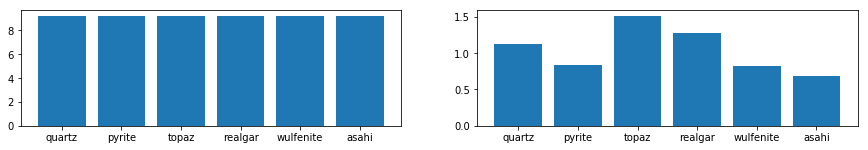

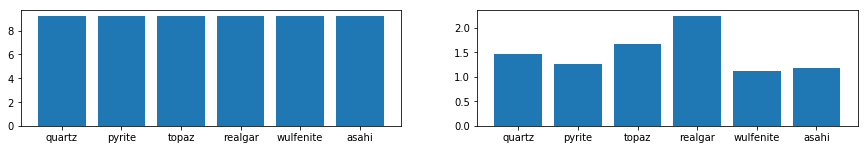

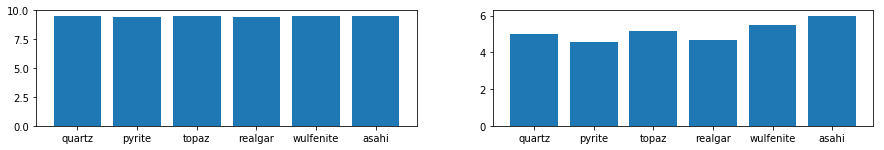

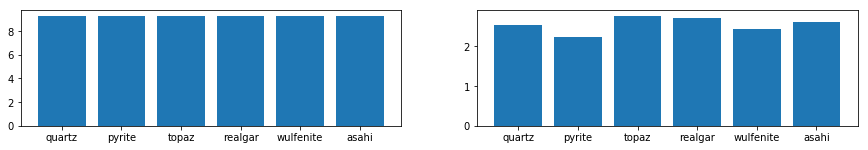

In [128]:
for i,w in enumerate(["canyon", "forest", "sandbox", "total"]):
    plt.figure(figsize=(15,20))
    plt.subplot(8,2,i*2+1)
    plt.ylim=(0,40)
    plt.bar([results[r]['machines'][0] for r in sorted(results.keys())],
           [np.mean(results[r]['mean'][w]) for r in sorted(results.keys())])
    plt.subplot(8,2,i*2+2)
    plt.ylim=(0,500)
    plt.bar([results[r]['machines'][0] for r in sorted(results.keys())],
           [np.mean(results[r]['var'][w]) for r in sorted(results.keys())])
    

plt.show()

In [145]:
results={}
# Extract frame rate by counting the average number of images saved for each environment
for index,dd in enumerate(data_dirs):
    print os.path.basename(dd)
    # extract hosts:
    import subprocess, shlex
    log_files=[log_dirs[index]+'/condor/'+f for f in os.listdir(log_dirs[index]+'/condor/') if f.endswith('log')]
    host_list=[l.split(' ')[8].split(':')[0][1:] for l in open(log_files[0],'r').readlines() if 'executing on host' in l]
    host_names=[]
    for host in host_list: host_names.append(subprocess.check_output(shlex.split('host '+host)).split(' ')[4].split('.')[0])
    for h in host_names: print h
    mean={'canyon':[],'forest':[],'sandbox':[]}
#     duration={'canyon':[],'forest':[],'sandbox':[]}
    run_dirs=[dd+'/'+rd for rd in os.listdir(dd) if rd.startswith('0')]
    for rd in run_dirs:
        try:
            begin=os.path.getmtime(rd+'/RGB/'+sorted(os.listdir(rd+'/RGB'))[0])
            end=os.path.getmtime(rd+'/RGB/'+sorted(os.listdir(rd+'/RGB'))[-1])
            if 'canyon' in rd:
                mean['canyon'].append(len(os.listdir(rd+'/RGB'))/(end-begin))
#                 duration['canyon'].append(end-begin)
            elif 'sandbox' in rd:
                mean['sandbox'].append(len(os.listdir(rd+'/RGB'))/(end-begin))
#                 duration['sandbox'].append(end-begin)
            elif 'forest' in rd:
                mean['forest'].append(len(os.listdir(rd+'/RGB'))/(end-begin))
#                 duration['forest'].append(end-begin)
        except:
            pass
    results[os.path.basename(dd)]={'machines': host_names, 'mean':mean}

rec_1
yildun
rec_10
garnet
rec_2
matar
rec_3
sadr
rec_4
oculus
rec_5
kunzite
rec_6
emerald
rec_7
jade
rec_8
amethyst
rec_9
iolite


In [146]:
# print result table wise
# Print results in md table format
msg="| "
for r in sorted(results.keys()):
#     print r
    msg="{0} | {1} ".format(msg, results[r]['machines'][0])
print msg,"| "
for w in "canyon", "forest", "sandbox":
    msg="| "+w+" "
    for r in sorted(results.keys()):
    #     print r
        msg="{0} | {1:0.2f} ({2:0.2f}) ".format(msg, np.mean(results[r]['mean'][w]), np.var(results[r]['mean'][w]))
    print msg,"| "


|  | yildun  | garnet  | matar  | sadr  | oculus  | kunzite  | emerald  | jade  | amethyst  | iolite  | 
| canyon  | 6.04 (3.18)  | 10.11 (6.07)  | 5.56 (2.96)  | 5.82 (1.90)  | 5.39 (3.65)  | 9.58 (9.35)  | 9.91 (7.53)  | 9.53 (9.62)  | 10.36 (4.55)  | 10.18 (5.20)  | 
| forest  | 6.12 (1.15)  | 8.82 (5.51)  | 5.59 (1.34)  | 5.32 (2.12)  | 5.59 (1.40)  | 8.98 (4.67)  | 8.96 (5.17)  | 9.11 (4.47)  | 9.31 (2.49)  | 8.72 (7.95)  | 
| sandbox  | 5.85 (0.58)  | 9.80 (0.82)  | 5.41 (0.53)  | 5.25 (0.56)  | 5.31 (0.46)  | 9.56 (0.83)  | 9.77 (1.05)  | 9.57 (2.74)  | 9.90 (0.87)  | 9.90 (1.18)  | 
